In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Análise de gastos de deputados

Este notebook tem como objetivo analisar gastos de deputados eleitos em 2014. Os dados utilizados foram emitidos pelo portal da Câmara dos Deputados e detalham os gastos feitos pelos deputados afim de exercer sua atividade parlamentar. Para obter mais informações, consulte este [link](https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar).

In [2]:
dados = pd.read_csv('data/dadosCEAP.csv', encoding='utf-8')

In [3]:
dados.head()

,nomeParlamentar,idCadastro,sgUF,sgPartido,tipoDespesa,especDespesa,fornecedor,CNPJCPF,tipoDocumento,dataEmissao,valorDocumento,valorGlosa,valorLíquido
0,ABEL MESQUITA JR.,178957.0,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,COMPANHIA DE AGUAS E ESGOTOS DE RORAIMA,5.939467e+12,0,2015-11-14 00:00:00,165.65,0.0,165.65
1,ABEL MESQUITA JR.,178957.0,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,COMPANHIA DE AGUAS E ESGOTOS DE RORAIMA,5.939467e+12,0,2015-12-10 00:00:00,59.48,0.0,59.48
2,ABEL MESQUITA JR.,178957.0,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,ELETROBRAS DISTRIBUIÇÃO RORAIMA,2.341470e+12,0,2015-11-27 00:00:00,130.95,0.0,130.95
3,ABEL MESQUITA JR.,178957.0,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,ELETROBRAS DISTRIBUIÇÃO RORAIMA,2.341470e+12,0,2015-12-30 00:00:00,196.53,347.0,193.06
4,ABEL MESQUITA JR.,178957.0,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,PAPELARIA ABC Com. e Ind. LTDA.,5.402520e+11,0,2015-02-23 00:00:00,310.25,0.0,310.25


Estas são as colunas do dataset:

In [4]:
for column in dados.columns:
    print(column)

nomeParlamentar
idCadastro
sgUF
sgPartido
tipoDespesa
especDespesa
fornecedor
CNPJCPF
tipoDocumento
dataEmissao
valorDocumento
valorGlosa
valorLíquido


E estes são os tipos de depsesa presentes:

In [5]:
for despesa in dados['tipoDespesa'].unique():
    print(despesa)

MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR
COMBUSTÍVEIS E LUBRIFICANTES.
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.
PASSAGENS AÉREAS
TELEFONIA
SERVIÇOS POSTAIS
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO
Emissão Bilhete Aéreo
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.
LOCAÇÃO OU FRETAMENTO DE AERONAVES
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS
ASSINATURA DE PUBLICAÇÕES
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR


## Que partidos mais fazem uso da CEAP? Quanto esses partidos gastam?

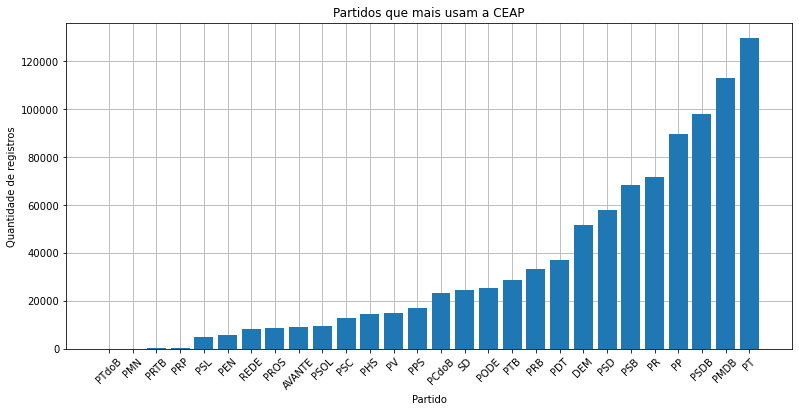

In [6]:
mopa = dados.groupby(['sgPartido']).count()['idCadastro'].sort_values()
x = mopa.index
y = mopa

plt.figure(figsize=(13, 6))
plt.title('Partidos que mais usam a CEAP')
plt.xlabel('Partido')
plt.xticks(rotation='45')
plt.ylabel('Quantidade de registros')
plt.bar(x, y, zorder=3)
plt.grid()
plt.show()

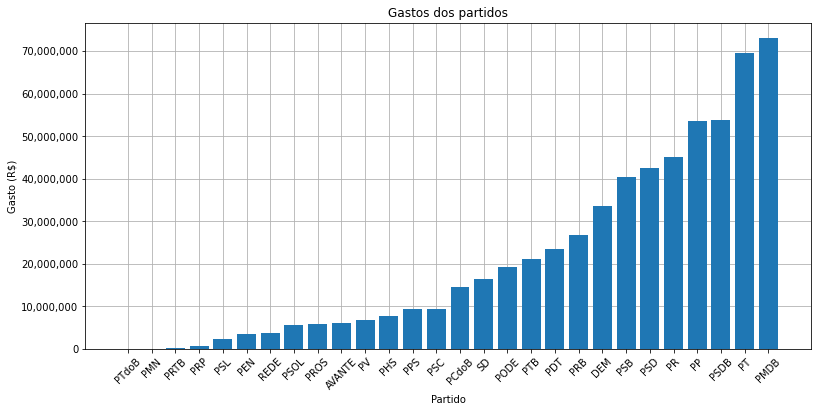

In [7]:
soma_documentos = dados.groupby('sgPartido').sum()['valorDocumento'].sort_values()

x = soma_documentos.index
y = soma_documentos

fig, ax = plt.subplots(figsize=(13, 6))
plt.bar(x, y, zorder=3)

plt.ticklabel_format(axis='y', style='plain')
ax.set_yticklabels(['{:,}'.format(int(elem)) for elem in ax.get_yticks()])

plt.title('Gastos dos partidos')
plt.xlabel('Partido')
plt.xticks(rotation='45')
plt.ylabel('Gasto (R$)')
plt.grid()
plt.show()

Observando os plots acima, pode-se concluir que a quantidade de registros de um partido na CEAP é diretamente proporcional a quanto cada partido gasta. 

## Das despesas, quais delas são mais comuns? Qual é o custo delas?

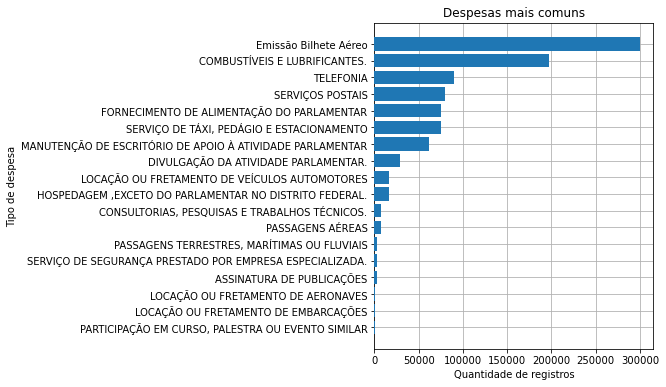

In [8]:
quantidade_despesas = dados.groupby(['tipoDespesa']).count()['nomeParlamentar'].sort_values()

x = quantidade_despesas.index
y = quantidade_despesas

plt.figure(figsize=(5, 6))
plt.title('Despesas mais comuns')
plt.xlabel('Quantidade de registros')
plt.ylabel('Tipo de despesa')
plt.barh(x, y, zorder=3)
plt.grid()
plt.show()

Parece que nossos deputados gostam bastante de viajar de avião. Tomara que estejam utilizando a classe econômica.

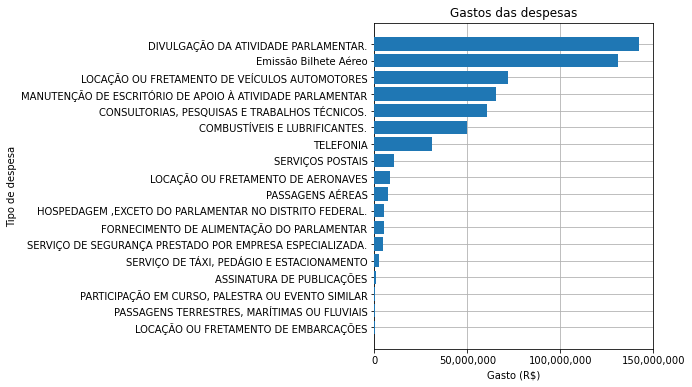

In [9]:
valor_despesas = dados.groupby(['tipoDespesa']).sum()['valorDocumento'].sort_values()

x = valor_despesas.index
y = valor_despesas

fig, ax = plt.subplots(figsize=(5, 6))

ax.barh(x, y, zorder=3)

from matplotlib import ticker
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

ax.set_xticks([0, 50000000, 100000000, 150000000])
ax.set_xticklabels(['0', '50,000,000', '100,000,000', '150,000,000'])

plt.title('Gastos das despesas')
plt.xlabel('Gasto (R$)')
plt.ylabel('Tipo de despesa')
plt.grid()
plt.show()

Pelo visto, nossos parlamentares preferem a classe executiva e se preocupam bastante em divulgar suas atividades.

## Quais estados possuem mais registros de parlamentares utilizando a CEAP? Quais são os estados que mais gastam?

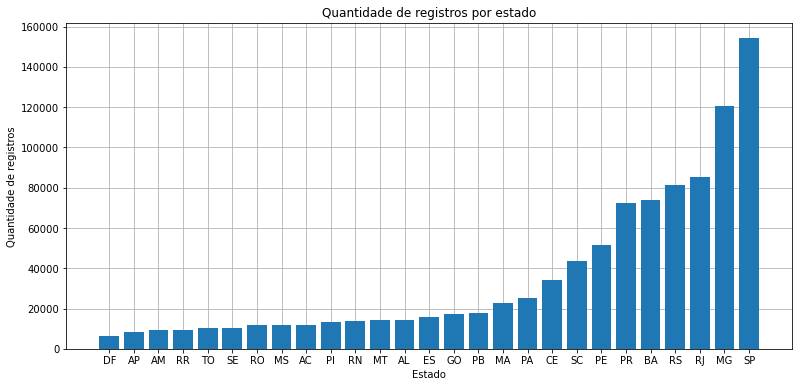

In [10]:
quantidade_estados_ceap = dados.groupby(['sgUF']).count()['nomeParlamentar'].sort_values()

x = quantidade_estados_ceap.index
y = quantidade_estados_ceap

plt.figure(figsize=(13,6))
plt.bar(x, y, zorder=3)

plt.title('Quantidade de registros por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de registros')
plt.grid()
plt.show()

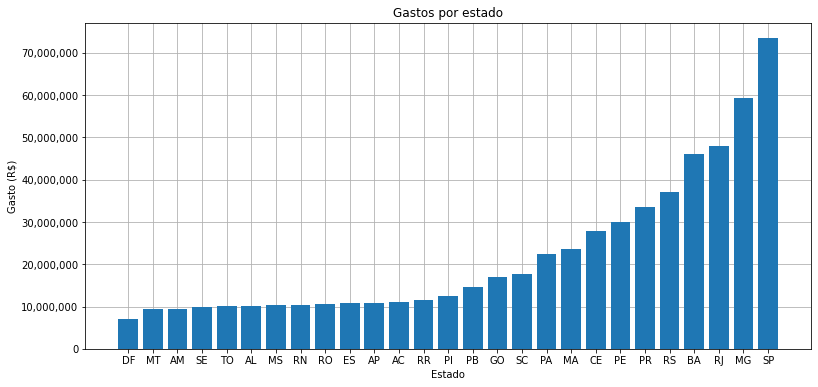

In [11]:
despesas_estados_ceap = dados.groupby(['sgUF']).sum()['valorDocumento'].sort_values()

x = despesas_estados_ceap.index
y = despesas_estados_ceap

fig, ax = plt.subplots(figsize=(13, 6))
plt.bar(x, y, zorder=3)

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

ax.set_yticklabels(['{:,}'.format(int(elem)) for elem in ax.get_yticks()])

plt.title('Gastos por estado')
plt.xlabel('Estado')
plt.ylabel('Gasto (R$)')
plt.grid()
plt.show()

Observando os dois gráficos acima, é possível concluir que os estados que mais tem registros incluídos na CEAP são os que mais gastam, com destaque para Bahia, Minas Gerais, Rio de Janeiro e São Paulo.

## Quais os parlamentares que mais gastam? E os que menos gastam?

In [12]:
gastos_parlamentares = dados.groupby(['nomeParlamentar']).sum()['valorDocumento'].sort_values()

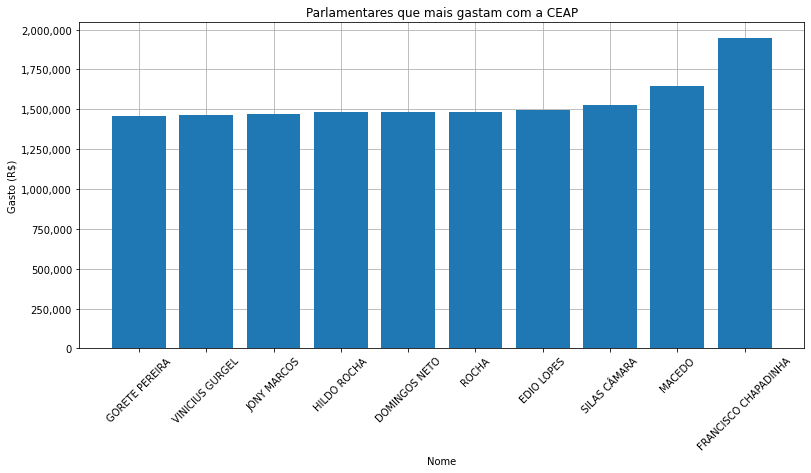

In [13]:
x = gastos_parlamentares.tail(n=10).index
y = gastos_parlamentares.tail(n=10)

fig, ax = plt.subplots(figsize=(13, 6)) 
plt.bar(x, y, zorder=3)
plt.xticks(rotation='45')

plt.ticklabel_format(axis='y', style='plain')
ax.set_yticklabels(['{:,}'.format(int(elem)) for elem in ax.get_yticks()])

plt.title('Parlamentares que mais gastam com a CEAP')
plt.xlabel('Nome')
plt.ylabel('Gasto (R$)')
plt.grid()
plt.show()

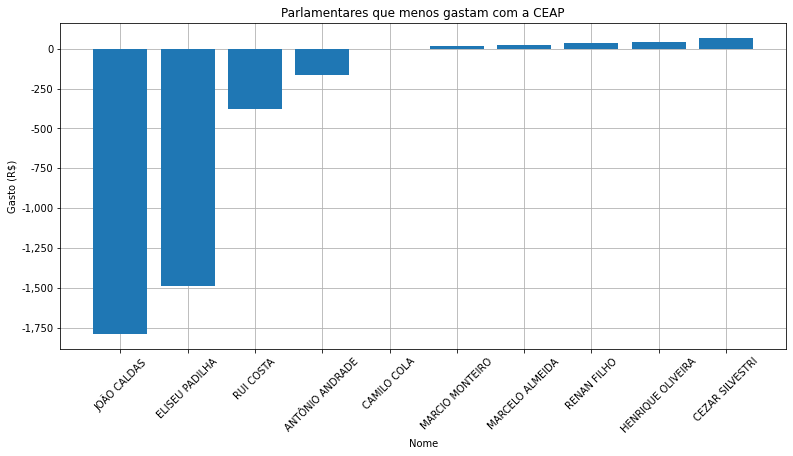

In [14]:
x = gastos_parlamentares.head(n=10).index
y = gastos_parlamentares.head(n=10)

fig, ax = plt.subplots(figsize=(13, 6)) 
plt.bar(x, y, zorder=3)
plt.xticks(rotation='45')

plt.ticklabel_format(axis='y', style='plain')
ax.set_yticklabels(['{:,}'.format(int(elem)) for elem in ax.get_yticks()])

plt.title('Parlamentares que menos gastam com a CEAP')
plt.xlabel('Nome')
plt.ylabel('Gasto (R$)')
plt.grid()
plt.show()

Parece que alguns deputados tem um gasto negativo. Isso se deve por que alguns bilhetes aéreos são uma compensação. Certo bilhete pode compensar um outro que não foi utilizado pelo deputado.

## Os parlamentares parecem viajar bastante. Algumas viagens podem ter sido para o exterior. Quais os estados cujos deputados mais gastam no exterior?

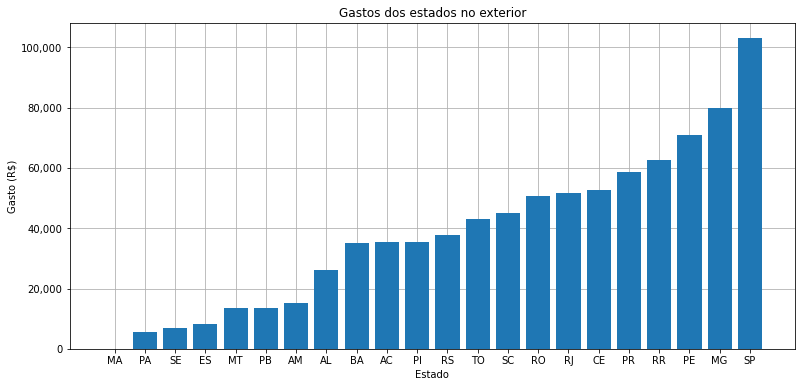

In [15]:
dados_exterior = dados.loc[dados['tipoDocumento'] == 2]

gastos_estados_exterior = dados_exterior.groupby(['sgUF']).sum()['valorDocumento'].sort_values()

x = gastos_estados_exterior.index
y = gastos_estados_exterior

fig, ax = plt.subplots(figsize=(13, 6))
plt.bar(x, y, zorder=3)

ax.set_yticklabels(['{:,}'.format(int(label)) for label in ax.get_yticks()])

plt.title('Gastos dos estados no exterior')
plt.xlabel('Estado')
plt.ylabel('Gasto (R$)')

plt.grid()
plt.show()

## Ainda considerando os gastos no exterior, que despesas os deputados mais geram?

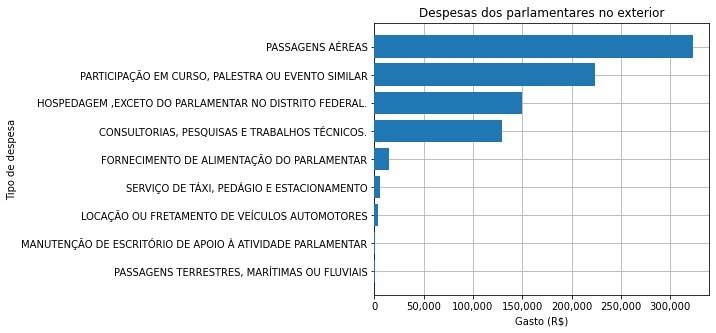

In [16]:
despesas_exterior = dados_exterior.groupby(['tipoDespesa']).sum()['valorDocumento'].sort_values()

x = despesas_exterior.index
y = despesas_exterior

fig, ax = plt.subplots(figsize=(6, 5))
plt.barh(x, y, zorder=3)

ax.set_xticklabels(['{:,}'.format(int(elem)) for elem in ax.get_xticks()])

plt.title('Despesas dos parlamentares no exterior')
plt.xlabel('Gasto (R$)')
plt.ylabel('Tipo de despesa')
plt.grid()
plt.show()


## Existe alguma relação entre a quantidade de gastos no exterior e o valor restituído da CEAP?

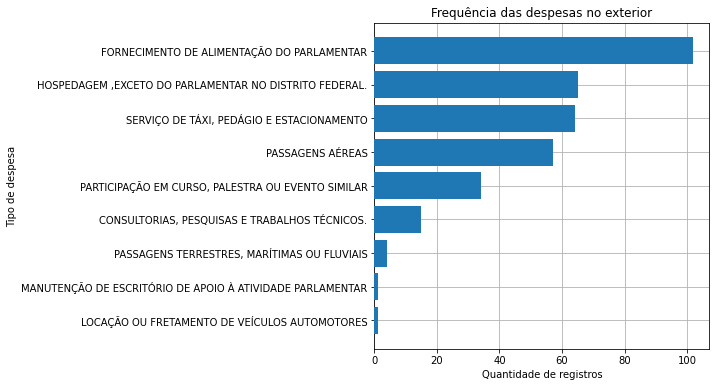

In [17]:
quantidade_despesas_exterior = dados_exterior.groupby(['tipoDespesa']).count()['nomeParlamentar'].sort_values()
valor_glosa_despesa = dados.groupby(['tipoDespesa']).sum()['valorGlosa'].sort_values()

x1 = quantidade_despesas_exterior.index
y1 = quantidade_despesas_exterior

x2 = valor_glosa_despesa.index
y2 = valor_glosa_despesa

fig, ax = plt.subplots(figsize=(6, 6))
plt.barh(x1, y1, zorder=3)

plt.title('Frequência das despesas no exterior')
plt.xlabel('Quantidade de registros')
plt.ylabel('Tipo de despesa')
plt.grid()
plt.show()

Aqui podemos observar que as despesas mais frequentes dos deputados no exterior são são relacionadas à alimentação, hospedagem e transporte.

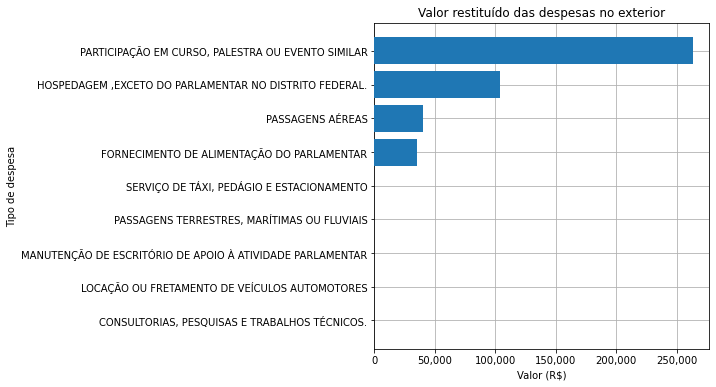

In [18]:
abatimento_despesas_exterior = dados_exterior.groupby(['tipoDespesa']).sum()['valorGlosa'].sort_values()

x = abatimento_despesas_exterior.index
y = abatimento_despesas_exterior

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(x, y, zorder=3)

ax.set_xticklabels(['{:,}'.format(int(elem)) for elem in ax.get_xticks()])

plt.title('Valor restituído das despesas no exterior')
plt.xlabel('Valor (R$)')
plt.ylabel('Tipo de despesa')
plt.grid()
plt.show()

Mas neste gráfico, é possível observar que a despesa que mais tem seu valor restituído é a participação em cursos. Ainda assim, as despesas com alimentação hospedagem e transporte tem parte do seu valor restituído. Pode-se concluir que há uma certa relação entre a quantidade de gastos no exterior e o valor restituído.

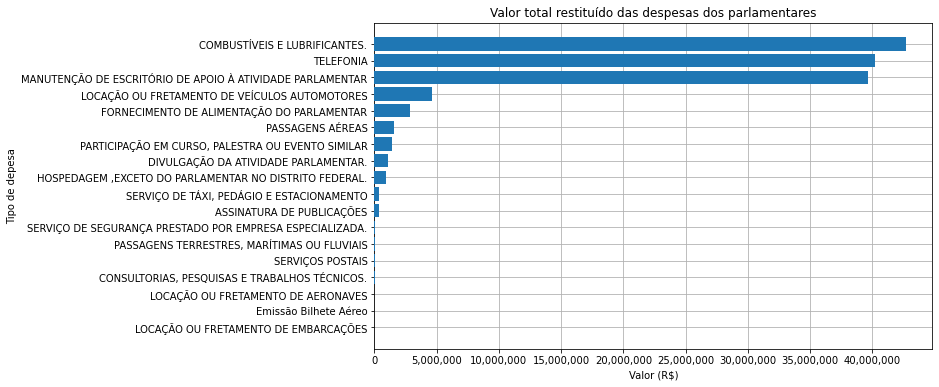

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
plt.barh(x2, y2, zorder=3)

plt.ticklabel_format(axis='x', style='plain')
ax.set_xticklabels(['{:,}'.format(int(elem)) for elem in ax.get_xticks()])

plt.title('Valor total restituído das despesas dos parlamentares')
plt.xlabel('Valor (R$)')
plt.ylabel('Tipo de depesa')
plt.grid()
plt.show()


Para fins de comparação, com o gráfico acima é possível verificar que o valor restituído dos gastos no exterior constituem apenas uma pequena parte do valor restituído total. Também é possível notar que os valores restituídos das despesas no exterior se tornam irrisórios quando comparados aos maiores valores totais restituídos.